# Train Perceptron on Iris Dataset

## Conditions:
- Restricted with two features to illustrate boundaries

## Libraries

In [ ]:
from ch02_perceptron import Perceptron
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## Read data

In [3]:
iris_url = 'https://archive.ics.uci.edu/ml/'\
    'machine-learning-databases/iris/iris.data'

iris_df = pd.read_csv(iris_url, header=None)
iris_df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [19]:
print(iris_df[iris_df[4]=='Iris-virginica'].iloc[0])
print(iris_df[iris_df[4]=='Iris-setosa'].iloc[0])


0               6.3
1               3.3
2               6.0
3               2.5
4    Iris-virginica
Name: 100, dtype: object
0            5.1
1            3.5
2            1.4
3            0.2
4    Iris-setosa
Name: 0, dtype: object


we extract the first **100 class labels** that correspond to the **50 Iris-setosa and 50 Iris-versicolor** flowers and convert the class labels into the two integer class labels, 1 (versicolor) and 0 (setosa), that we assign to a vector, y, where the values method of a pandas DataFrame yields the corresponding NumPy representation.

Similarly, we extract the **first feature column (sepal length) and the third feature column (petal length)** of those 100 training examples and assign them to a feature matrix, X, which we can visualize via a two-dimensional scatterplot:

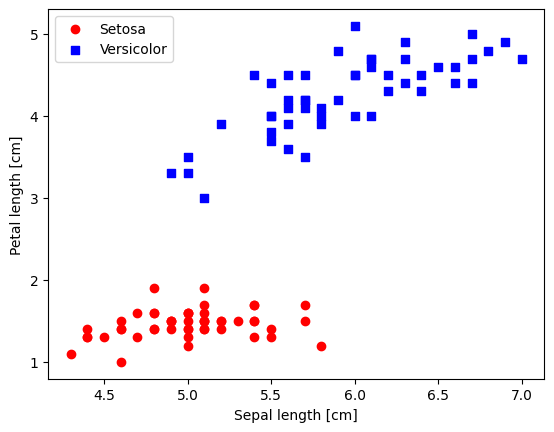

In [4]:
# Setosa and versicolor
y = iris_df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)
# Extract sepal length and petal length
X = iris_df.iloc[0:100, [0, 2]].values
# Plot data
plt.scatter(X[:50, 0],X[:50, 1],
            color='r',marker='o',label='Setosa')
plt.scatter(X[50:100, 0],X[50:100, 1],
            color='b',marker='s',label='Versicolor')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

## Train Perceptron

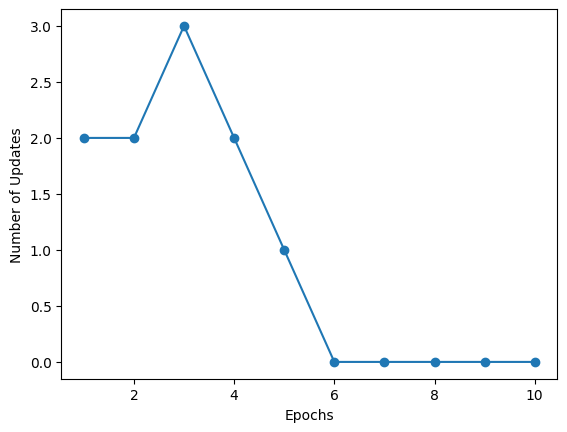

In [5]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1),
         ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of Updates')
plt.show()

our perceptron converged after the **sixth epoch and should now be able to classify the training examples perfectly**. Let’s implement a small convenience function to visualize the decision boundaries for two-dimensional datasets:

In [21]:
# Test
print(f'{ppn.w_=}')
print(f'{ppn.b_=}')
iris_virginica = np.array([6.3,6.0])
iris_setosa = np.array([5.1,1.4])
print('Virginica:',ppn.predict(iris_virginica))
print('Virginica:',ppn.net_input(iris_virginica))
print('Setosa:',ppn.predict(iris_setosa))
print('Setosa:',ppn.net_input(iris_setosa))

ppn.w_=array([-0.37654416,  0.93821618])
ppn.b_=np.float64(-0.2)
Virginica: 1
Virginica: 3.057068892710152
Setosa: 0
Setosa: -0.806872552195679


In [28]:
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

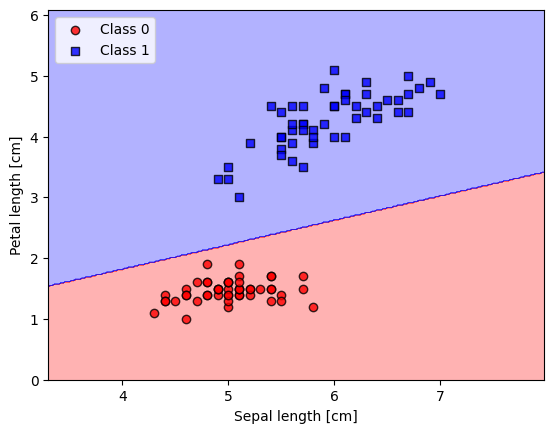

In [29]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

Although the perceptron classified the two Iris flower classes perfectly, **convergence is one of the biggest problems of the perceptron**. Rosenblatt proved mathematically that the perceptron learning rule converges if the two classes can be separated by a linear hyperplane. However, if the classes cannot be separated perfectly by such a linear decision boundary, the weights will never stop updating unless we set a maximum number of epochs.